# ***Clustering and Customer Segmentation Analysis on E-Commerce Behavior Data***

**Dataset Link** : https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset/data

# ***Libraries***

In [108]:
# importing all the required libraries
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scipy.stats import skew, kurtosis

# ***Loading Data***

In [109]:
# Reading the 'E-commerce Customer Behavior Dataset' dataset
ecommerce_data = pd.read_csv("/content/E-commerce Customer Behavior - Sheet1.csv")

In [110]:
# Observing some initial records from the dataset
ecommerce_data.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


This E-commerce Customer Behavior Dataset provides details about customer demographics, purchasing patterns, satisfaction levels and engagement metrics.

In [111]:
# Checking the size of the dataset
print(f"Size of the dataset : {ecommerce_data.shape}")

Size of the dataset : (350, 11)


There are total 350 records in the dataset with 11 features providing the detailed breakdown of their interactions and transactions.

In [112]:
# Checking the dataset information
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


Here we can see that columns are in different data types such as integer, float and boolean.

In [113]:
# indentifying the missing value count
print(f"\tMissing Values")
print("*" *30)
ecommerce_data.isna().sum()

	Missing Values
******************************


,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


There are 2 null values in the 'Satisfaction Level' column, need to handle it carefully to avoid further complexities.

In [114]:
# Checking the unique values
ecommerce_data['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

Here we can see there are 'nan' values in the 'Satisfaction Level' column those can be filled with the 'mode' of the column.

In [115]:
# filling the 'nan' values
most_frequent = ecommerce_data['Satisfaction Level'].mode()[0]
ecommerce_data['Satisfaction Level'] = ecommerce_data['Satisfaction Level'].fillna(most_frequent)

In [116]:
# checking whether the nan values are filled are not
print(f"Missing Values : {ecommerce_data.isna().sum().sum()}")

Missing Values : 0


No null values in the dataset.

In [117]:
# Counting the duplicate records
print(f"Duplicate samples : {ecommerce_data.duplicated().sum()}")

Duplicate samples : 0


There are no duplicate records in the dataset.

In [118]:
# examining the statistical summary of the dataset using the 'describe()' function
print("Statistical Summary :")
ecommerce_data.describe()

Statistical Summary :


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


Above table helps in analysisng the **mean**, **median** and **standard deviation** of the data.

* By looking at above data we can say that customers spend between 410.80 and 1520.10 with a median spend of $775.20 which clearly indicates presence of variation in purchasing.  
* Most customers purchased around 12 items with an interquartile range of 9 - 15 items which highlightes typical customer engagement.  


In [119]:
# Selecting only numerical columns
num_col = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

# Calculating their skewness and kurtosis
skewness = ecommerce_data[num_col].apply(skew)
kurt = ecommerce_data[num_col].apply(kurtosis)

# Combine results into a dataframe and printing them
statistics = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurt
})

statistics

,Skewness,Kurtosis
Age,0.466331,-0.778875
Total Spend,0.560153,-1.081590
Items Purchased,0.646374,-0.630383
Average Rating,-0.126276,-1.210844
Days Since Last Purchase,0.674638,-0.515304


**Skewness**

* It shows that the most features have mild positive skewness which indicates the presence of a few higher outliers except for Average Rating which is slightly left tailed with higher ratings dominating

**Kurtosis**

* All features are platykurtic which suggests relatively flat distributions with limited extreme outliers. It indicates the data is well dispersed and lacks sharp peaks.

# ***Data Analysis***

### ***Vertical Bar Graph***

In [120]:
# defining the function for plotting vertical bar plot to visualize the average total spend by membership type
def plot_avg_total_spend_by_membership_type(data):
    """
    This function plots vertical bar plot to visualize the average total spend by membership type

    Parameters:
    data: dataframe containing the 'Membership Type' and 'Total Spend' columns
    """
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=data, x='Membership Type', y='Total Spend', estimator='mean', color='#E1FFBB')

    # Adding annotations at the center of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
                    ha='center', va='center',
                    fontsize=14, color='black')

    # Adding title and label formatting for better understanding
    plt.title('Average Total Spend by Membership Type', fontsize=16, fontweight='bold', color='black')
    plt.xlabel('Membership Type', fontsize=14, color='black')
    plt.ylabel('Average Total Spend', fontsize=14, color='black')
    plt.xticks(fontsize=14, color='black')
    plt.yticks(fontsize=14, color='black')
    plt.show()

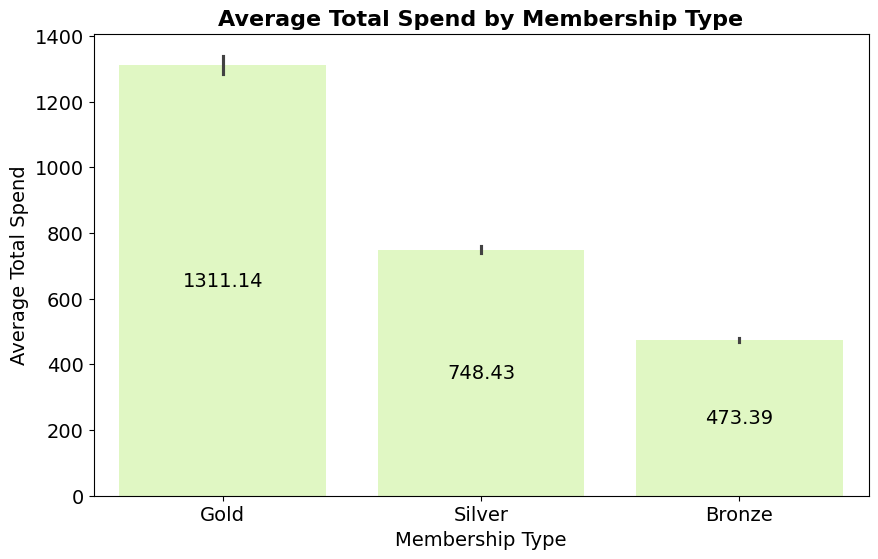

In [121]:
# Calling the function
plot_avg_total_spend_by_membership_type(ecommerce_data)

* The above vertical bar plot indicates that there is difference in average total spend between Gold, Silver and Bronze members. Gold members on average spend nearly twice as much as Silver members and over three times as much as Bronze members. This suggests that the Gold membership tier offers more benefits.


### ***Line Chart***

In [122]:
# defining the function for plotting line chart for visualizing Total Items Purchased by City
def plot_total_items_purchased_by_city(data):
    """
    This function plots line chart to visualize the total items purchased by city.

    Parameters:
    data: dataframe containing the 'City' and 'Items Purchased' columns
    """
    plt.figure(figsize=(10, 6))  # Set figure size

    # Grouping by 'City' and calculating total of 'Items Purchased'
    city_items_purchased_total = data.groupby('City')['Items Purchased'].sum().reset_index()

    # Sorting by 'City'
    city_items_purchased_total = city_items_purchased_total.sort_values(by='City')

    # Plotting line chart
    sns.lineplot(data=city_items_purchased_total, x='City', y='Items Purchased', marker='o', color='#A8CD89')

    # Adding title and labels
    plt.title('Total Items Purchased by City', fontsize=16, fontweight='bold', color='black')
    plt.xlabel('City', fontsize=14, color='black')
    plt.ylabel('Total Items Purchased', fontsize=14, color='black')
    plt.xticks(fontsize=14, color='black', rotation=0)
    plt.yticks(fontsize=14, color='black')

    # Show the plot
    plt.show()

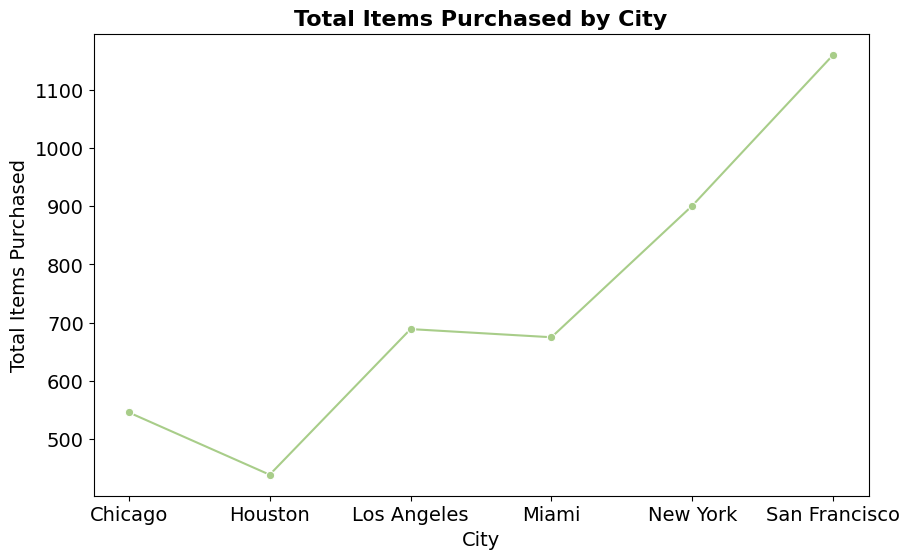

In [123]:
# Calling the function
plot_total_items_purchased_by_city(ecommerce_data)

The above line chart clearly shows that the number of items purchased varies significantly across the six cities. San Francisco leads with the highest number of items purchased followed by New York and Miami. Chicago has the lowest number of items purchased.



### ***Heatmap***

In [124]:
# defining a function to plot a correlation matrix
def plot_correlation_heatmap(data, numerical_columns):
    """
    This function plots a correlation heatmap to visualize the relationship between numerical features

    Parameters:
    - data: dataset
    - numerical_columns: list of column names to include in the correlation analysis
    """
    # Calculating and creating correlation matrix
    correlation_matrix = data[numerical_columns].corr()

    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f',
                linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size": 14})

    # Adding title and labels
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', color='black')
    plt.xlabel('Features', fontsize=14, color='black')
    plt.ylabel('Features', fontsize=14, color='black')
    plt.xticks(fontsize=14, color='black')
    plt.yticks(fontsize=14, color='black')
    plt.show()

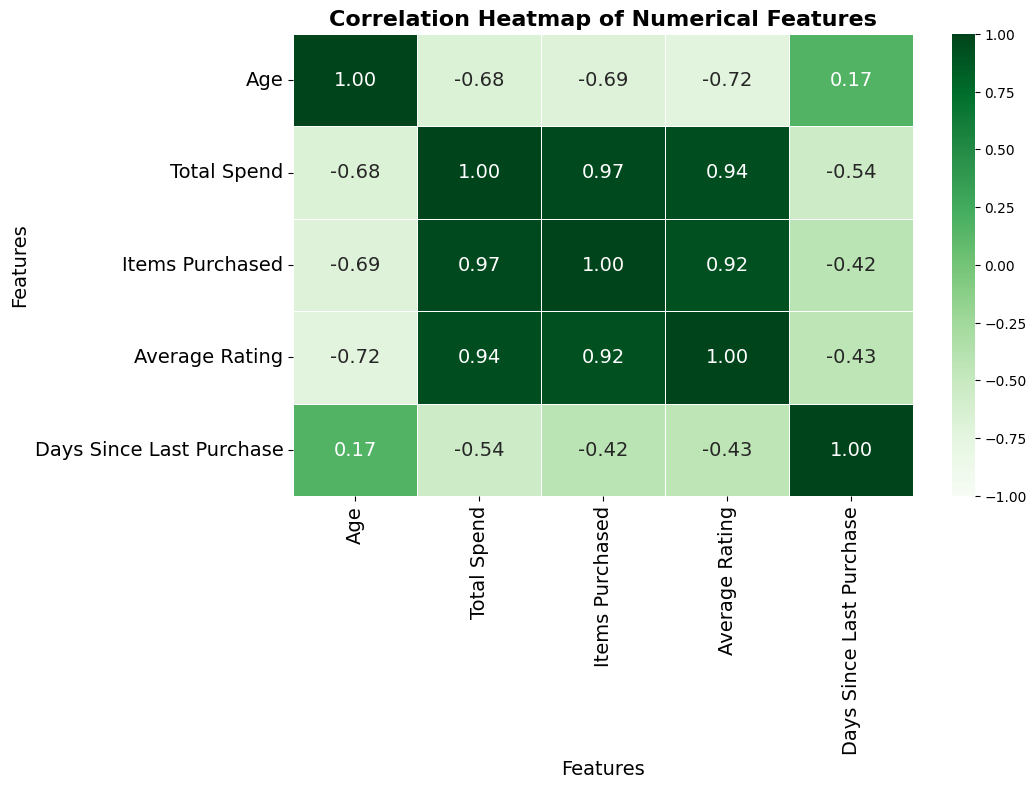

In [125]:
# Calling the function
num_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
plot_correlation_heatmap(ecommerce_data, num_cols)

Total Spend, Items Purchased and Average Rating features are showing high degree of positive correlation (around 0.90 to 0.97) which suggests that customers who spend more tend to purchase more items and also give higher ratings.

There is negative correlation between Age and Total Spend (-0.68), Items Purchased (-0.69) and Average Rating (-0.72). This indicates that older customers tend to spend less, buy fewer items and give lower ratings compared to younger customers. The negative correlation between Days Since Last Purchase and Age (0.17) suggests that older customers tend to have longer intervals between purchases.

# ***Data Pre-processing***

## ***Scaling***

In [126]:
# scaling the column values in same range
columns_to_scale = ['Age', 'Total Spend']

# Initializing the Standard Scaler
scaler = StandardScaler()

# Applying scaling
ecommerce_data[columns_to_scale] = scaler.fit_transform(ecommerce_data[columns_to_scale])

In [127]:
ecommerce_data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,-0.945152,New York,Gold,0.760130,14,4.6,True,25,Satisfied
1,102,Male,0.082826,Los Angeles,Silver,-0.179459,11,4.1,False,18,Neutral
2,103,Female,1.933185,Chicago,Bronze,-0.925570,9,3.4,True,42,Unsatisfied
3,104,Male,-0.739557,San Francisco,Gold,1.756144,19,4.7,False,12,Satisfied
4,105,Male,-1.356343,Miami,Silver,-0.345692,13,4.0,True,55,Unsatisfied


# ***K-means Clustering***

### ***Elbow Plot***

In [128]:
# Defining function to plot the elbow plot
def plot_elbow_plot(data, max_k=3):
    """
    It plots the elbow graph and prints the optimal number of clusters for K-Means.

    Parameters:
    - data: dataframe or numpy array containing the features to be clustered
    - max_k: maximum number of clusters to test
    """
    wcss = []

    # Calculating WCSS for different k values
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss_value = kmeans.inertia_
        wcss.append(wcss_value)

    # Plotting Elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, color='#A8CD89', marker='o')
    plt.title('Elbow Method for Optimal K', fontsize=16, fontweight='bold', color='black')
    plt.xlabel('Number of Clusters', fontsize=14, color='black')
    plt.ylabel('WCSS', fontsize=14, color='black')
    plt.xticks(fontsize=14, color='black')
    plt.yticks(fontsize=14, color='black')
    plt.show()

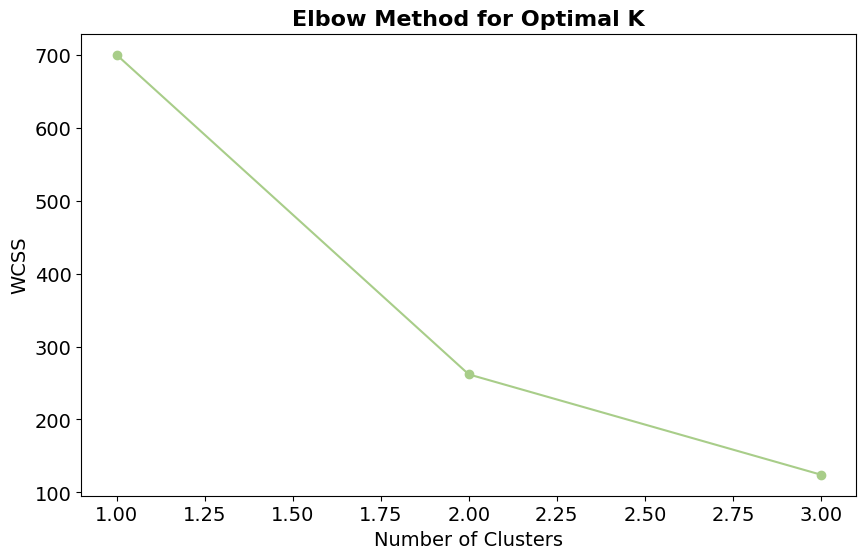

In [129]:
# Calling function to plot elbow plot
plot_elbow_plot(ecommerce_data[columns_to_scale])

In [130]:
# defining a function to apply k means
def apply_kmeans(data, n_clusters):
    """
    This function applies K-Means clustering to the data and add the cluster labels to dataframe

    Parameters:
    data: features to be clustered
    n_clusters: number of clusters to form.

    Returns:
    data: dtaframe with column 'Cluster'
    """
    # Fitting K-Means clustering model
    data_copy = data.copy()
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_copy)

    # Adding cluster labels to the DataFrame
    data_copy['Cluster'] = kmeans.labels_

    return data_copy

In [131]:
# Applying K-Means clustering to the data with the chosen number of clusters
ecommerce_data_with_clusters = apply_kmeans(ecommerce_data[columns_to_scale], n_clusters=2)

In [132]:
ecommerce_data_with_clusters.head()

,Age,Total Spend,Cluster
0,-0.945152,0.760130,1
1,0.082826,-0.179459,0
2,1.933185,-0.925570,0
3,-0.739557,1.756144,1
4,-1.356343,-0.345692,1


In [133]:
# Selecting features for clustering
features_to_cluster = ['Age', 'Total Spend']

# Initializing kmeans model with optimal clusters - 2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=8, random_state=0)

# Fitting kmeans model on the selected features and getting the cluster centers
kmeans.fit(ecommerce_data[features_to_cluster])
centers = kmeans.cluster_centers_

In [134]:
centers

array([[ 0.69338208, -0.69305139],
       [-0.90322139,  0.90279063]])

In [135]:
# Backscaling all the scaled columns and centers
backscaled_data_all = scaler.inverse_transform(ecommerce_data[columns_to_scale])
centers_backscaled = scaler.inverse_transform(kmeans.cluster_centers_)

In [136]:
centers_backscaled

array([[  36.96969697,  594.81515152],
       [  29.20394737, 1171.77763158]])

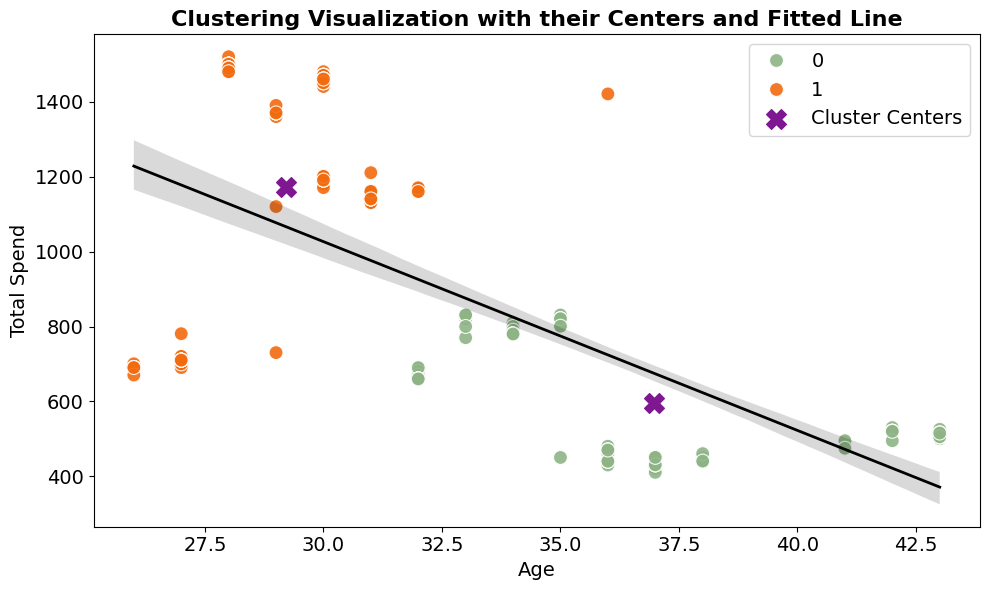

In [137]:
# Visualizing clusters along with their centers
plt.figure(figsize=(10, 6))

# Scatter plot of data points
sns.scatterplot(x=backscaled_data_all[:, 0],
                y=backscaled_data_all[:, 1],
                hue=ecommerce_data_with_clusters['Cluster'],
                palette=['#8EB486', '#F26B0F'],
                s=100, alpha=0.9)

# Plotting cluster centers
plt.scatter(centers_backscaled[:, 0], centers_backscaled[:, 1], c='#7E1891', s=200, marker='X', label='Cluster Centers')

# Adding the fitted regression line
sns.regplot(x=backscaled_data_all[:, 0],
            y=backscaled_data_all[:, 1],
            scatter=False,
            color='black',
            line_kws={'linewidth': 2, 'color': 'black'})

# Adding title and labels
plt.title('Clustering Visualization with their Centers and Fitted Line', fontsize=16, fontweight='bold', color='black')
plt.xlabel(columns_to_scale[0], fontsize=14, color='black')
plt.ylabel(columns_to_scale[1], fontsize=14, color='black')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

* Here fitted regression line showing negative slope which suggests that as Age increases Total Spend decrease. There is inverse relationship between age and total spend among the customers in the dataset.
* Customers in the younger age group (around 30 years) tend to spend more while older customers (above 35 years) generally spend less.



# ***Model - Random Forest***

In [138]:
ecommerce_data.head(2)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,-0.945152,New York,Gold,0.760130,14,4.6,True,25,Satisfied
1,102,Male,0.082826,Los Angeles,Silver,-0.179459,11,4.1,False,18,Neutral


In [139]:
# seperating the columns
X = ecommerce_data_with_clusters[['Age', 'Total Spend']]
y = ecommerce_data_with_clusters['Cluster']

In [140]:
# Spliting the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [141]:
def random_forest_classifier(X_train, y_train, random_state=0):
    """
    This function trains random forest model
    Parameters:
    X_train : feature matrix for training
    y_train : Target vector for training
    random_state : random state for reproducibility

    Returns:
    rf_model: trained RF model
    """
    # Initializing and fitting random forest with training data
    rf_model = RandomForestClassifier(random_state=random_state)
    rf_model.fit(X_train, y_train)

    return rf_model

In [142]:
# calling a function
rf_model = random_forest_classifier(X_train, y_train)

In [143]:
# Making predictions on the test dataset
y_pred_rf = rf_model.predict(X_test)

# Evaluating model on accuarcy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Score : {accuracy_rf:.2f}')

Accuracy Score : 1.00


In [144]:
# Printing classification report
print("Classification Report :")
print(classification_report(y_test, y_pred_rf))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        34

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



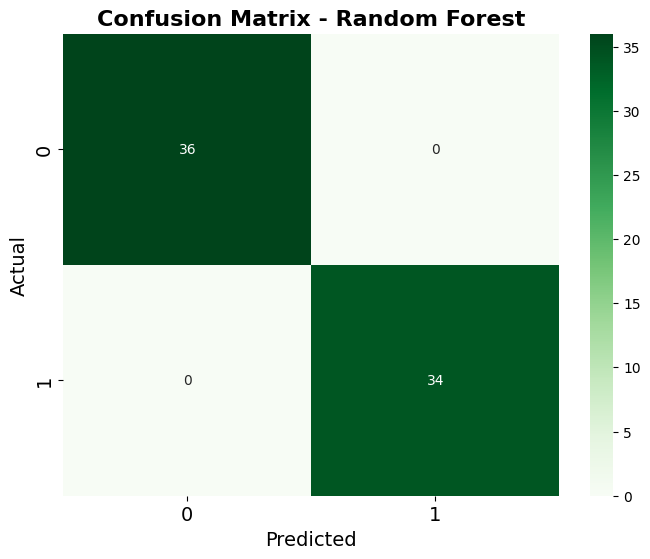

In [145]:
# Computing confusion matrix - Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

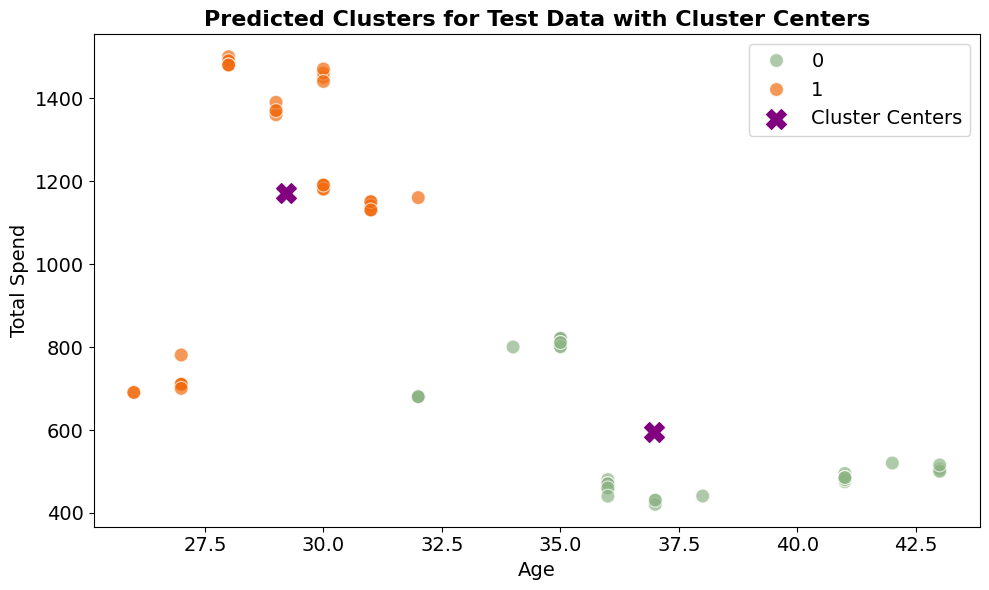

In [146]:
# Visualizing predicted clusters on the test dataset
backscaled_X_test = scaler.inverse_transform(X_test[columns_to_scale])
plt.figure(figsize=(10, 6))

# Scatter plot of test data points with predictions
sns.scatterplot(x=backscaled_X_test[:, 0],
                y=backscaled_X_test[:, 1],
                hue=y_pred_rf,
                palette=['#8EB486', '#F26B0F'], s=100, alpha=0.7)

# Plotting cluster centers
plt.scatter(centers_backscaled[:, 0], centers_backscaled[:, 1], c='purple', s=200, marker='X', label='Cluster Centers')

# Adding title and labels
plt.title('Predicted Clusters for Test Data with Cluster Centers', fontsize=16, fontweight='bold', color='black')
plt.xlabel(features_to_cluster[0], fontsize=14, color='black')
plt.ylabel(features_to_cluster[1], fontsize=14, color='black')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

* The plot is showing two distinct clusters with one group having higher Total Spend and younger Age, while the other group having lower Total Spend and older Age.
* So model effectively distinguished between two clusters.

# ***Conclusion***

* Model successfully captured patterns in the data and provided meaningful and useful insights for customer segmentation.